In [3]:
import pandas as pd

In [8]:
#index_col specifies which column will be index. We chosed first row
data = pd.read_csv('https://raw.githubusercontent.com/justmarkham/scikit-learn-videos/master/data/Advertising.csv', index_col=0)

data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [9]:
data.tail()

,TV,Radio,Newspaper,Sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [10]:
data.shape

(200, 4)

In [12]:
import seaborn as sns

%matplotlib inline

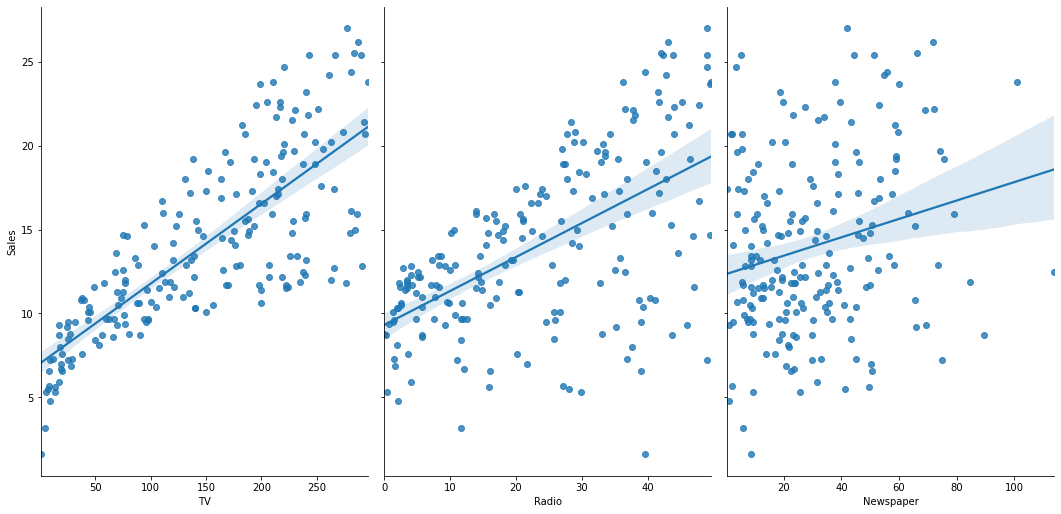

In [17]:
#kind draws regression line
sns.pairplot(data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=7, aspect=0.7, kind='reg')

In [18]:
feature_cols = ['TV', 'Radio', 'Newspaper']

X = data[feature_cols]

X.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [21]:
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [26]:
#select a series from the DataFrame
y = data['Sales']

#same with above command
#y = data.Sales

y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

In [27]:
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(200,)


In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [34]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

LinearRegression()

In [35]:
#The intercept (often labeled the constant) is the expected mean value of Y when all X=0(Beta 0)
print(lin_reg.intercept_)
#In linear regression, coefficients are the values that multiply the predictor values(Beta N)
print(lin_reg.coef_)

2.87696662231793
[0.04656457 0.17915812 0.00345046]


In [36]:
#pair the seature names and coefficients
zip(feature_cols, lin_reg.coef_)

In [37]:
y_pred = lin_reg.predict(X_test)

In [39]:
import numpy as np
from sklearn.metrics import mean_squared_error

print(np.sqrt(mean_squared_error(y_test, y_pred)))


1.4046514230328953


## Feature Selection

In [43]:
# we ejected newspaper for getting the best RMS Error for the best model fro this particular dataset
X = data[['TV', 'Radio']]

y = data.Sales

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

print(np.sqrt(mean_squared_error(y_test, y_pred)))

1.3879034699382888
